# Entrenamiento con datos de entrenamiento
<hr>

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import pandas as pd

In [2]:
X = pd.read_csv("../Reduccion_descriptores/Prueba_hipotesis/STAT3_h.csv")

In [3]:
X.shape

(830, 75)

In [4]:
X.fillna(method='ffill', inplace=True)


C:\Users\Eliud\AppData\Local\Temp\ipykernel_11724\419284443.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


In [5]:
df = pd.read_csv("../Reduccion_descriptores/Datos_con_1000/STAT3_1000.csv")

In [6]:
y = df["Inhibidor"]

In [7]:
y

0      0
1      1
2      0
3      0
4      0
      ..
825    1
826    0
827    1
828    1
829    0
Name: Inhibidor, Length: 830, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
pipe = Pipeline([
    ('xgb', XGBClassifier())
])

In [10]:
param_grid = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__learning_rate': [1, 0.1, 0.01],
    'xgb__max_depth': [10, 20, 30, 40, 50]
}

In [11]:
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

In [12]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END xgb__learning_rate=1, xgb__max_depth=10, xgb__n_estimators=100; total time=   0.2s
[CV] END xgb__learning_rate=1, xgb__max_depth=10, xgb__n_estimators=100; total time=   0.1s
[CV] END xgb__learning_rate=1, xgb__max_depth=10, xgb__n_estimators=100; total time=   0.1s
[CV] END xgb__learning_rate=1, xgb__max_depth=10, xgb__n_estimators=100; total time=   0.1s
[CV] END xgb__learning_rate=1, xgb__max_depth=10, xgb__n_estimators=100; total time=   0.1s
[CV] END xgb__learning_rate=1, xgb__max_depth=10, xgb__n_estimators=200; total time=   0.1s
[CV] END xgb__learning_rate=1, xgb__max_depth=10, xgb__n_estimators=200; total time=   0.2s
[CV] END xgb__learning_rate=1, xgb__max_depth=10, xgb__n_estimators=200; total time=   0.1s
[CV] END xgb__learning_rate=1, xgb__max_depth=10, xgb__n_estimators=200; total time=   0.1s
[CV] END xgb__learning_rate=1, xgb__max_depth=10, xgb__n_estimators=200; total time=   0.2s
[CV] END xgb__lear

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constraints=N...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'xgb__learning_rate': [1, 0.1, 0.01],
                         'xgb__max_depth': [10, 20, 30, 40, 50],
                         'xgb__n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

# Selección del mejor modelo
<hr>

In [13]:
best_model = grid_search.best_estimator_

# Resultados del modelo
<hr>

In [14]:
y_predicha = best_model.predict(X_test)

In [15]:
#Calcular estadísticos
accuracy = accuracy_score(y_test, y_predicha)
recall = recall_score(y_test, y_predicha, average='weighted')
precision = precision_score(y_test, y_predicha, average='weighted')
f1 = f1_score(y_test, y_predicha, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.873
Recall 0.873
precision 0.871
f1 0.867


In [16]:
y_entrenamiento = best_model.predict(X_train)

In [17]:
accuracy = accuracy_score(y_train, y_entrenamiento)
recall = recall_score(y_train, y_entrenamiento, average='weighted')
precision = precision_score(y_entrenamiento, y_entrenamiento, average='weighted')
f1 = f1_score(y_train, y_entrenamiento, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.992
Recall 0.992
precision 1.0
f1 0.992


# Confusion Matrix
<hr>

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [19]:
mat = confusion_matrix(y_predicha, y_test)

<Axes: >

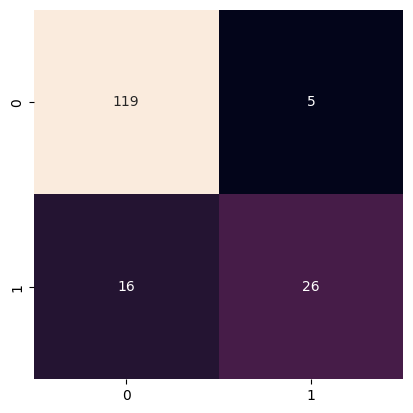

In [20]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar = False, xticklabels=df["Inhibidor"].value_counts().index, yticklabels=df["Inhibidor"].value_counts().index)

# Guardar modelo
<hr>

In [21]:
import joblib

In [22]:
joblib.dump(pipe, '../GuardadoDeModelos/STAT3_MD/modelo_XGBoost.joblib')

['../GuardadoDeModelos/STAT3_MD/modelo_XGBoost.joblib']